# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [14]:
# `Since features is a 4D array containing raw pixel data of the traffic sign images, 
# (num_examples, width, height, channels), use shape to extract these

(num_train_examples, train_width, train_height, train_channels) = X_train.shape
(num_test_examples, test_width, test_height, test_channels) = X_test.shape

# Number of training examples
n_train = num_train_examples

# Number of testing examples.
n_test = num_test_examples

# What's the shape of an traffic sign image?
image_shape = (train_width, train_height)

# How many unique classes/labels there are in the dataset.
#  use unique from numpy to get uniques & then len to count
import numpy as np
uniques = np.unique(y_train)
n_classes = len(uniques)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

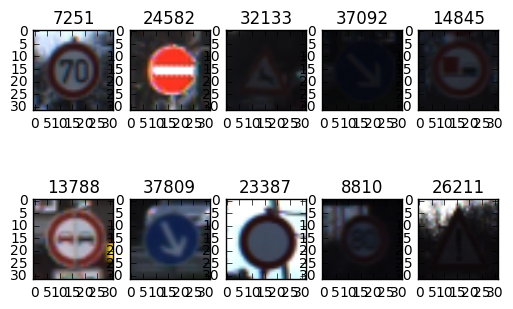

Class 0 has 210.0 examples
Class 1 has 2220.0 examples
Class 2 has 2250.0 examples
Class 3 has 1410.0 examples
Class 4 has 1980.0 examples
Class 5 has 1860.0 examples
Class 6 has 420.0 examples
Class 7 has 1440.0 examples
Class 8 has 1410.0 examples
Class 9 has 1470.0 examples
Class 10 has 2010.0 examples
Class 11 has 1320.0 examples
Class 12 has 2100.0 examples
Class 13 has 2160.0 examples
Class 14 has 780.0 examples
Class 15 has 630.0 examples
Class 16 has 420.0 examples
Class 17 has 1110.0 examples
Class 18 has 1200.0 examples
Class 19 has 210.0 examples
Class 20 has 360.0 examples
Class 21 has 330.0 examples
Class 22 has 390.0 examples
Class 23 has 510.0 examples
Class 24 has 270.0 examples
Class 25 has 1500.0 examples
Class 26 has 600.0 examples
Class 27 has 240.0 examples
Class 28 has 540.0 examples
Class 29 has 270.0 examples
Class 30 has 450.0 examples
Class 31 has 780.0 examples
Class 32 has 240.0 examples
Class 33 has 689.0 examples
Class 34 has 420.0 examples
Class 35 has 12

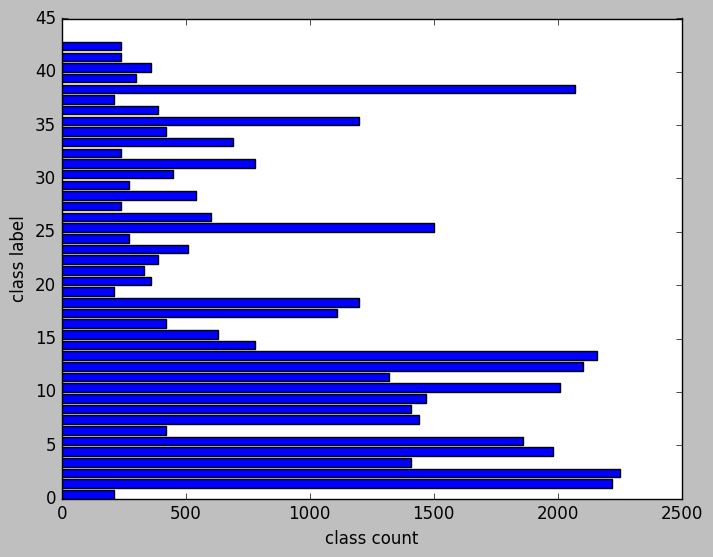

In [54]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

# plotting traffic sign images
# Lets first choose 10 random images from the training set
random_image_index = np.random.randint(low=0,high=n_train,size=10)
#for idx in random_image_index:
#    print(idx)
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axes = plt.subplots(2, 5)

for ax, idx in zip(axes.flat, random_image_index):
    ax.imshow(X_train[idx,...])
    ax.set_title(str(idx))

plt.show()

#plotting the count of each sign
#Lets now count how many examples of each class we have
counts = np.zeros(n_classes)
indices = np.arange(n_classes)
for i in y_train:
    counts[i] += 1

# zip counts with indices
indexcount = zip(indices, counts)

for i,j in indexcount:
    print("Class " + str(i) + " has " + str(j) + " examples" )
    
import matplotlib.pyplot as pyplt
pyplt.rcdefaults()
pyplt.barh(indices, counts)
pyplt.xlabel('class count')
pyplt.ylabel('class label')
pyplt.show()    

Issues with Class Imbalance:  Some of the classes in this dataset have 10x as many examples as other classes. For instance, class 0 has only 210 examples & class 12 has 2100 ie. 10 times that many!  A model trained on this dataset cannot accurately distinguish between classes 0 and 12. We don't want our model to be capable of predicting class 12 ten times as frequently as class 0. We should augment our dataset ( generate fake data ) to make the class distribution more uniform.


## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. 


Implementation:

<function matplotlib.pyplot.show>

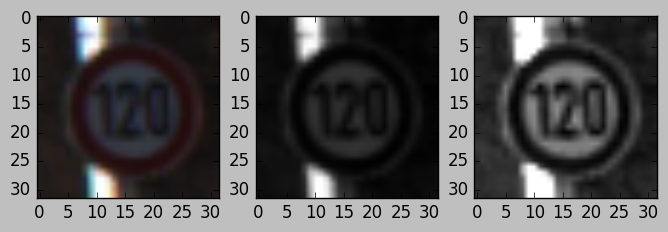

In [140]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# TEST IMAGE SHARPENING ON 1 IMAGE
fig, axes = plt.subplots(1,3)

orig = np.copy(X_train[12345,...]) #pick image number 12345
axes[0].imshow(orig) #display original img

# Convert to grayscale & display
g = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
axes[1].imshow(g, cmap='gray')

# Add blur, subtract gaussian bluured image from original to sharpen
# Then threshold gray levels
blur = cv2.medianBlur(g,5)
gg = cv2.addWeighted(g,1.5,blur,-0.5,0)
ret,img = cv2.threshold(gg,127,255,cv2.THRESH_TRUNC)
axes[2].imshow(img, cmap='gray')
plt.show


In [164]:
# NOW WRITE A ROUTINE TO SHARPEN AN ARRAY OF IMAGES
import cv2

def normalize(imagearray):
    retval = []
    for idx in range(imagearray.shape[0]):
        g = cv2.cvtColor(imagearray[idx,...], cv2.COLOR_BGR2GRAY)
        blur = cv2.medianBlur(g,5)
        gg = cv2.addWeighted(g,1.5,blur,-0.5,0)
        ret,img = cv2.threshold(gg,127,255,cv2.THRESH_TRUNC)
        retval.append(img)
        
    retval = np.array(retval)
    return retval

X_train_norm = normalize(X_train)
print(X_train_norm.shape)

(39209, 32, 32)


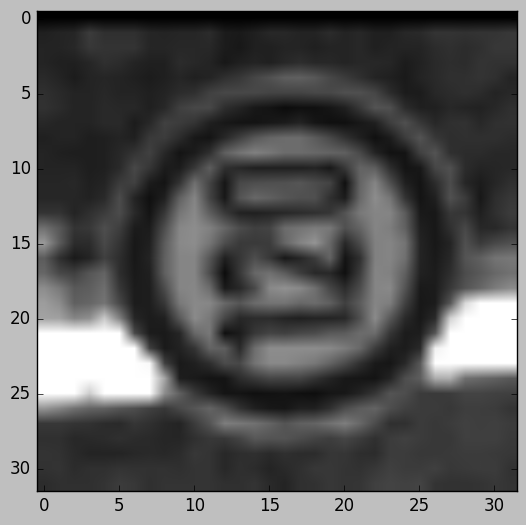

In [149]:
# Rotating an image thru a random angle
M = cv2.getRotationMatrix2D((16,16),90,1) #angle = 90 degrees
dst = cv2.warpAffine(img,M,(32,32))
plt.imshow(dst, cmap='gray')

In [179]:
# NOW WRITE A ROUTINE TO GENERATE ADDITIONAL IMAGES BY RANDOM ROTATION
# 
# How many fake images ?
# If the class label has <500 instances, make 4 fakes by rotation
# If the class label has <1K instances, make 3 fakes
# If the class label has<1.5K instances, make 2 fakes
# If the class label has <2K instances, make 1 extra fake
# If the class label has >2K instances, do nothing since we have adequate samples
def rot(img,angle):
    M = cv2.getRotationMatrix2D((16,16),angle,1)
    return cv2.warpAffine(img,M,(32,32))

def augmentdata(imagearray, y_train, counts):
    retval = []
    lval = []
    for idx in range(imagearray.shape[0]):
        img = imagearray[idx,...]
        mylabel = y_train[idx] # this is the class label of img
        c = counts[mylabel] # how many examples do i have
        retval.append(img)
        lval.append(mylabel)
        #print("Count" + str(c))

        if c < 500:
            #print("making 4 extra")
            i1,i2,i3,i4 = rot(img,45),rot(img,135),rot(img,225),rot(img,315) 
            retval.append(i1)
            lval.append(mylabel)
            retval.append(i2)
            lval.append(mylabel)
            retval.append(i3)
            lval.append(mylabel)
            retval.append(i4)
            lval.append(mylabel)
        elif c < 1000:
            #print("making 3 extra")

            i1,i2,i3 = rot(img,45),rot(img,135),rot(img,225) 
            retval.append(i1)
            lval.append(mylabel)
            retval.append(i2)
            lval.append(mylabel)
            retval.append(i3)
            lval.append(mylabel)
        elif c < 1500:
            #print("making 2 extra")

            i1,i2 = rot(img,45),rot(img,135) 
            retval.append(i1)
            lval.append(mylabel)
            retval.append(i2)
            lval.append(mylabel)
        elif c < 2000:
            #print("making 1 extra")

            i1 = rot(img,45) 
            retval.append(i1)
            lval.append(mylabel)
        else: pass
        
            
    retval = np.array(retval)
    lval = np.array(lval)
    return retval, lval

augmented_features,augmented_labels = augmentdata(X_train_norm,y_train, counts)
print(augmented_features.shape)
print(augmented_labels.shape)

(103136, 32, 32)
(103136,)


In [181]:
#Training & Validation split
aug_indices = np.arange(augmented_features.shape[0])
np.random.shuffle(aug_indices)

In [189]:
lastidx = int(len(aug_indices)*0.8) # 80% of data for training
trainidx = aug_indices[0:lastidx]
validationidx = aug_indices[lastidx+1:len(aug_indices)]
print(trainidx.shape)
print(validationidx.shape)
trainingfeatures = []
traininglabels = []
validationfeatures = []
validationlabels = []
for i in trainidx:
    trainingfeatures.append(augmented_features[i])
    traininglabels.append(augmented_labels[i])
for i in validationidx:
    validationfeatures.append(augmented_features[i])
    validationlabels.append(augmented_labels[i])
trainingfeatures = np.array(trainingfeatures)
traininglabels = np.array(traininglabels)
validationfeatures = np.array(validationfeatures)
validationlabels = np.array(validationlabels)
    

(82508,)
(20627,)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Image Normalization**

The dataset has images of varying brightness & color. So I decided to convert to grayscale - this eliminates the varying color. Then I applied a standard image sharpening filter - given an image, I subtract a gaussian blurred version of the same. Finally, I truncated the grayscale range using an image thresholding range. 

Once I was satisfied with the results on a single random image, I coded up a normalize() routine to normalize the entire training dataset using this grayscale+sharpen+threshold technique.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

** Making additional images (fake data) via random rotation **
Rotating an image through a random angle is a simple effective way to manufacture fake data. 
For each image, we can make upto 4 fakes by rotating thru 45,135,225 & 315 degrees.

** Fake data generation at scale **
We desire to augment datasize based on number of examples for each class.
Our class distribution histogram gives us a split by 500.
So given an image, we examine its label.
If the class label has <500 instances, make 4 fakes by rotation
If the class label has <1K instances, make 3 fakes
If the class label has<1.5K instances, make 2 fakes
If the class label has <2K instances, make 1 extra fake
If the class label has >2K instances, do nothing since we have adequate samples
We take these fakes & attach the same label to these fakes.
We then return the augmented dataset.

This augmented dataset has a much more uniform distribution than the original training set.

** Training & Validation Set **

We shuffle the augmented dataset indices, which now has 103K examples & slice the first 80% of the augmented data for training,rest for validation. Note that we only shuffle the indices, not the actual features & labels. Getting the indices in a random order is sufficient to ensure a randfom 80% training & 20% test set.  

In [190]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [191]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [192]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

In [193]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [194]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [197]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    trainingfeatures = np.array(trainingfeatures)
    traininglabels = np.array(traininglabels)
    validationfeatures = np.array(validationfeatures)
    validationlabels = np.array(validationlabels)
    X_validation = validationfeatures[...,np.newaxis]
    y_validation = validationlabels[...,np.newaxis]

    for i in range(EPOCHS):
        X_train = trainingfeatures[...,np.newaxis]
        y_train = traininglabels[...,np.newaxis]
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...



InvalidArgumentError: Incompatible shapes: [128] vs. [128,10]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]

Caused by op 'Equal', defined at:
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-194-03f1bf2fec56>", line 1, in <module>
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 728, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/kraman/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [128] vs. [128,10]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]


### Question 3

_What does your final architecture look like? 

Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. 

Augmented traffic classifier images are grayscale, C is 1 in this case.

Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.
Activation = relu
Pooling. The output shape should be 14x14x6.
Layer 2: Convolutional. The output shape should be 10x10x16.
Activation = relu
Pooling. The output shape should be 5x5x16.
Flatten. 
Layer 3: Fully Connected. This should have 120 outputs.
Activation.  = relu
Layer 4: Fully Connected. This should have 84 outputs.
Activation = relu
Layer 5: Fully Connected (Logits). This should have 10 outputs.
Output
Return the result of the 2nd fully connected layer.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
AdamOptimizer with the 0.001 learning rate, 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.